In [8]:
#%%capture
#!pip install pytesseract

In [1]:
import cv2
import numpy as np
import pytesseract
from PIL import ImageGrab
import time
import matplotlib.pyplot as plt
%matplotlib inline
print(pytesseract.__version__)

0.3.8


In [2]:
def display_img(image):
    
    plt.figure(figsize = (15,15))
    plt.imshow(image,cmap = "gray")
    plt.title(f"Shape : {image.shape}")
    plt.axis("off")
    plt.show()

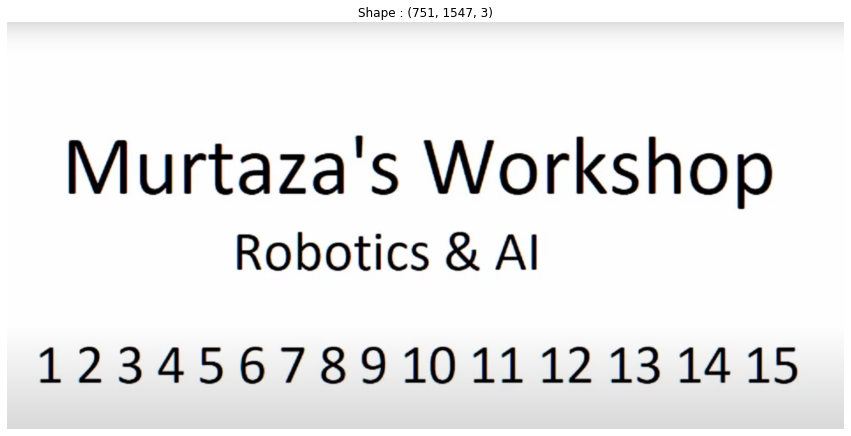

In [3]:
img = cv2.imread("/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/text.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

display_img(img)

In [4]:
print(pytesseract.image_to_string(img))

Murtaza's Workshop
Robotics & Al

123456789101112131415



In [6]:
hImg,wImg,_ = img.shape

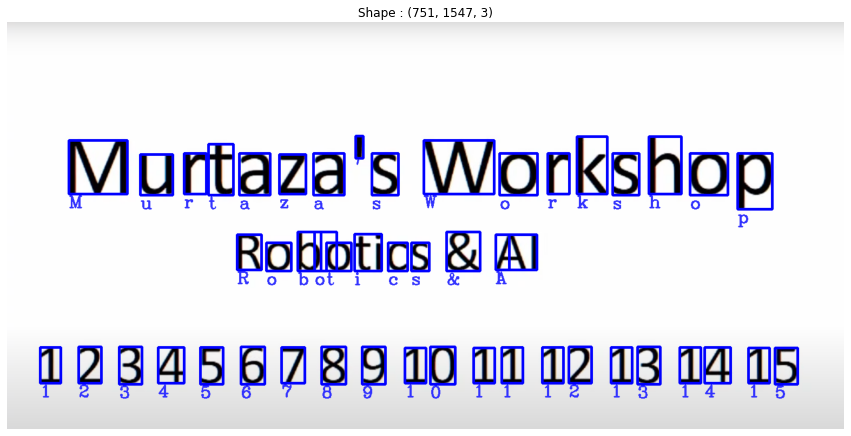

In [7]:
### Detecting Words and Digits

img = cv2.imread("/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/text.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

boxes = pytesseract.image_to_boxes(img)

for b in boxes.splitlines():
    b = b.split(" ")
    x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
    cv2.rectangle(img, (x,hImg-y),(w,hImg-h),(0,0,255),3)
    cv2.putText(img,b[0],(x,hImg-y+25),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)
    
display_img(img)

In [9]:
x,y,w,h,hImg,wImg

(1419, 83, 1461, 150, 751, 1547)

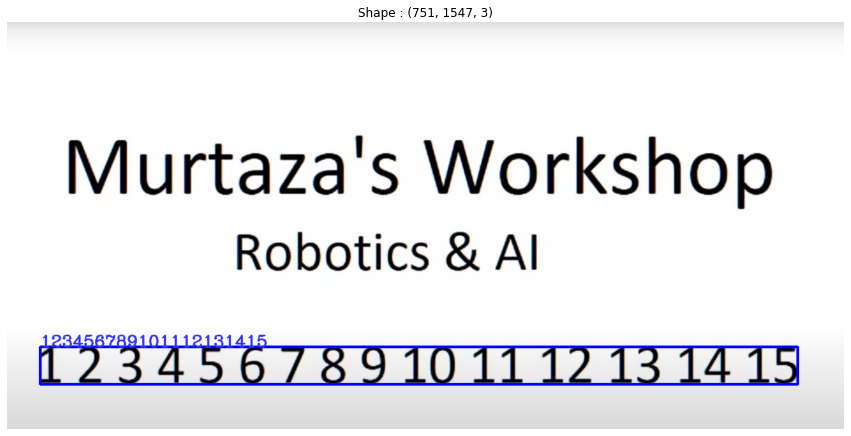

In [10]:
img = cv2.imread("/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/text.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Just Digits
# Bunu kaldırırsan hepsi !!!
cong = r"--oem 3 --psm 6 outputbase digits"

boxes = pytesseract.image_to_data(img, config = cong)
#print(boxes)
for x,b in enumerate(boxes.splitlines()):
    # x neden sıfır istemiyoruz başlık kısmını istemiyoruz !!!
    if x != 0:
        b = b.split("\t")
        #print(b)
        if len(b) == 12:
            if b[-1] != "": 
            #print(b)
                x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
                cv2.rectangle(img,(x,y),(w+x,y+h),(0,0,255),3)
                cv2.putText(img,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)
                
display_img(img)

In [7]:
#### Webcam and Screen Capture Example 

import cv2
import numpy as np
from PIL import ImageGrab

cap = cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)

def captureScreen(bbox = (300,300,1500,1000)):
    
    capSrc = np.array(ImageGrab.grab(bbox))
    capSrc = cv2.cvtColor(capSrc,cv2.COLOR_BGR2RGB)
    return capSrc

#captureScreen()

while True:
    
    timer = cv2.getTickCount()
    _,frame = cap.read()
    hImg,wImg,_ = frame.shape
    
    #frame = captureScreen()
    
    boxes = pytesseract.image_to_boxes(frame)
    
    for b in boxes.splitlines():
        b = b.split(" ")
        x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
        cv2.rectangle(frame,(x,hImg-y),(w,hImg-h),(50,50,255),2)
        cv2.putText(frame,b[0],(x,hImg-y+25),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)
        
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
    
    cv2.putText(frame, "FPS : " + str(int(fps)), (75, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (20,230,20), 2);
    cv2.imshow("Result", frame)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()